In [1]:
import json
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from pprint import pprint
from secrets import api_key
import numpy as np
import scipy.stats as sts

 


In [2]:
url = "https://api.sportsdata.io/v3/nfl/stats/json/Injuries"
season = 2020
week = 2
#team = "IND"
#target_url = f'{url}/{season}/{week}/{team}?key={api_key}'
target_url = f'{url}/{season}/{week}?key={api_key}'
print (target_url)

response = requests.get(target_url).json()

https://api.sportsdata.io/v3/nfl/stats/json/Injuries/2020/2?key=92d1a6e04f074f0dacd70085e3f4ceaa


In [3]:
#seasons = ["2012REG","2013REG","2014REG","2015REG","2016REG","2017REG","2018REG","2019REG","2020REG"]
#week = range(1, 17)
#seasons = []
#weeks = []
#params = {"season": seasons,
#         "week": weeks, "key": api_key}
#test_url = "https://api.sportsdata.io/v3/nfl/stats/json/Injuries/"
#print(test_url)

#for season  in seasons:
   
    #new_url = f'{test_url}{season}/{week}?key={api_key}'
    #response = requests.get(new_url, params=params).json()
    
    
    #print(json.dumps(response, indent=2))

In [4]:
seasons = ["2012","2013","2014","2015","2016","2017","2018","2019","2020"]
weeks = range(1, 17)
#player = []
#seasons = []
#weeks = []
# params = {"season": seasons,
#          "week": weeks, "key": api_key}
# test_url = "https://api.sportsdata.io/v3/nfl/stats/json/Injuries/"
# print(test_url)

# for season in seasons:
#     for week in weeks:
#         new_url = f'{test_url}{season}/{week}?key={api_key}'
#         response = requests.get(new_url, params=params).json()


#         print(response)
    
    
    

In [5]:
injury_id = []
player_id =[]
season_list = []
season_type = []
week_list = []
name_list = []
team_list =[]
position_list = []
injury_body_part = []
declared_inactive = []



params = {"season": seasons,
         "week": 1, "key": api_key}
test_url = "https://api.sportsdata.io/v3/nfl/stats/json/Injuries/"
print(test_url)

for season  in seasons:
    for week in weeks:
        
        new_url = f'{test_url}{season}/{week}?key={api_key}'
        response = requests.get(new_url, params=params).json()
        if not response:
            continue

#         injury_id = injury_id.append(response[0]["InjuryID"])
#         player_id = player_id.append(response[0]["PlayerID"])
#         season_list = season_list.append(response[0]["Season"])
#         season_type = season_type.append(response[0]["SeasonType"])
#         week_list = week_list.append(response[0]["Week"])
#         name_list = name_list.append(response[0]["Name"])
#         team_list = team_list.append(response[0]["Team"])
#         position_list = position_list.append(response[0]["Position"])
#         injury_body_part = injury_body_part.append(response[0]["BodyPart"])
#         declared_inactive = declared_inactive.append(response[0]["DeclaredInactive"])
        #print(response[0]["InjuryID"])    
        #injury_id.append(response[0]["InjuryID"])
        player_id.extend([response[player]["PlayerID"] for player in range(len(response))])
        season_list.extend([response[season]["Season"] for season in range(len(response))])
        season_type.extend([response[seasontype]["SeasonType"] for seasontype in range(len(response))])
        week_list.extend([response[0]["Week"] for week_list in range(len(response))])
        name_list.extend([response[name_list]["Name"] for name_list in range(len(response))])
        team_list.extend([response[team_list]["Team"] for team_list in range(len(response))]) 
        position_list.extend([response[position]["Position"] for position in range(len(response))])
        injury_body_part.extend([response[body_part]["BodyPart"] for body_part in range(len(response))])
        declared_inactive.extend([response[inactive]["DeclaredInactive"] for inactive in range(len(response))])
        
        #print(json.dumps(response, indent=4))


https://api.sportsdata.io/v3/nfl/stats/json/Injuries/


In [6]:
injury_data = pd.DataFrame({'Player ID': player_id,
                           'Season': season_list,
                           'Season Type': season_type,
                            'Week': week_list,
                           'Name': name_list,
                           'Team': team_list,
                           'Position': position_list,
                           'Body Part': injury_body_part,
                           'Declared Inactive': declared_inactive})
injury_data

,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
0,6048,2012,1,1,Early Doucet,ARI,WR,--,False
1,6353,2012,1,1,Adam Snyder,ARI,G,Elbow,False
2,9319,2012,1,1,LaRod Stephens-Howling,ARI,RB,Groin,False
3,9323,2012,1,1,Chris Wells,ARI,RB,Hamstring,False
4,9782,2012,1,1,Gregory Toler,ARI,CB,Hip,False
...,...,...,...,...,...,...,...,...,...
55522,21742,2020,1,7,Antonio Gandy-Golden,WAS,WR,Hamstring,True
55523,21755,2020,1,7,Isaiah Wright,WAS,WR,Shoulder,True
55524,21875,2020,1,7,James Smith-Williams,WAS,DE,Concussion,True
55525,21955,2020,1,7,Thaddeus Moss,WAS,TE,Undisclosed,True


In [7]:
# output_data_file = ".../output_data/injury_data.csv"
# injury_data.to_csv('injury_data.csv', encoding='utf-8')

In [8]:
# The path to our CSV file
question3 = "output_data/injury_data.csv"

# Read our Kickstarter data into pandas
question3_df = pd.read_csv(question3)
question3_df.head()

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
0,0,6048,2012,1,1,Early Doucet,ARI,WR,--,False
1,1,6353,2012,1,1,Adam Snyder,ARI,G,Elbow,False
2,2,9319,2012,1,1,LaRod Stephens-Howling,ARI,RB,Groin,False
3,3,9323,2012,1,1,Chris Wells,ARI,RB,Hamstring,False
4,4,9782,2012,1,1,Gregory Toler,ARI,CB,Hip,False


In [9]:

question3_df = question3_df.rename(columns={"Body Part": "Body_Part"})

weeks_df = question3_df[["Season", "Week", "Team",
                            "Body_Part" ]]
 

# Find all body parts listing concussion 


weeks_df['Body_Part'] = weeks_df['Body_Part'].replace(
    {'Concussion, ankle': 'Concussion', 'Concussion, eye': 'Concussion', 'Concussion, hip': 'Concussion', 'Concussion, illness': 'Concussion',\
    'Concussion, stinger': 'Concussion', 'Concussion, elbow': 'Concussion', 'Concussion, knee, ankle': 'Concussion','Concussion, hamstring': 'Concussion',\
    'Concussion, finger': 'Concussion', 'Concussion, chest': 'Concussion', 'Concussion, left shoulder': 'Concussion',\
    'Concussion, toe': 'Concussion', 'Concussion, foot, thigh': 'Concussion', 'Concussion, shoulder': 'Concussion',\
    'Concussion, groin': 'Concussion','Concussion, not injury related': 'Concussion', 'Concussion, neck': 'Concussion',\
    'Concusison': 'Concussion', 'Head': 'Concussion'})
concussion_df = weeks_df.loc[(weeks_df['Body_Part'] == 'Concussion')]
concussion_df
 
#weeks_df
# Concussion, ankle
# Concussion, eye
# Concussion, hip
# Concussion
# Concussion, illness
# Concussion, stinger
# Concussion, elbow
# Concussion, knee, ankle
# Concussion, hamstring
# Concussion, finger
# Concussion, chest
# Concussion, left shoulder
# Concussion, toe
# Concussion, foot, thigh
# Concussion, shoulder
# Concussion, groin
# Concussion, not injury related
# Concussion, neck
# Concussion, shoulder
# Concussion, ankle
# Head
# Concusison


C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Season,Week,Team,Body_Part
15,2012,1,BAL,Concussion
33,2012,1,CHI,Concussion
44,2012,1,CIN,Concussion
75,2012,1,DAL,Concussion
89,2012,1,DET,Concussion
...,...,...,...,...
55417,2020,7,MIA,Concussion
55439,2020,7,NE,Concussion
55457,2020,7,NO,Concussion
55473,2020,7,NYG,Concussion


In [10]:
per_week= concussion_df.groupby(["Season", "Week"]).count()
print(per_week)
mean=per_week.groupby(["Week"]).agg({"Body_Part" : ["mean"]})
mean
 


             Team  Body_Part
Season Week                 
2012   1       14         14
       2       19         19
       3       25         25
       4       23         23
       5       27         27
...           ...        ...
2020   3        7          7
       4        5          5
       5        8          8
       6        5          5
       7        9          9

[135 rows x 2 columns]


,Body_Part
,mean
Week,
1,15.222222
2,17.222222
3,16.666667
4,17.000000
5,20.666667
6,20.333333
7,18.555556
8,21.375000


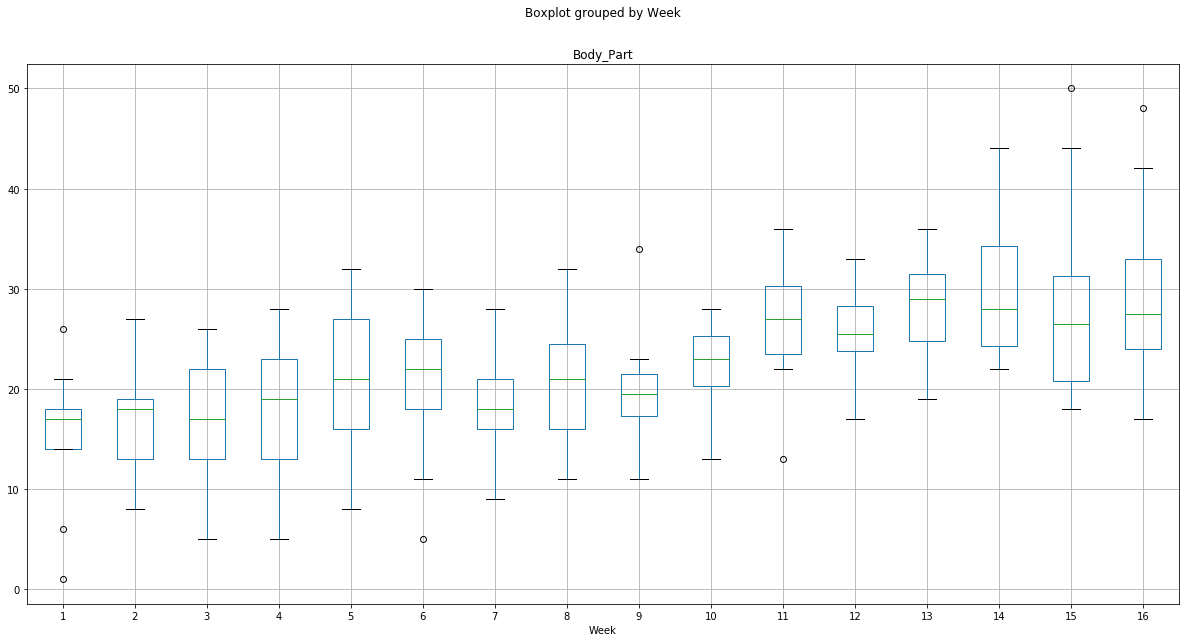

In [20]:
per_week.boxplot("Body_Part", by="Week", figsize=(20, 10))

plt.savefig("ConcussionsPerWeekAvg.png")

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# per_week['Week'] = per_week['Week'].replace(
#     {'1': 'Week1', '2': 'Week2', '3': 'Week3', '4': 'Week4','5': 'Week5', '6': 'Week6', '7': 'Week7','8': 'Week8',\
#     '9': 'Week9', '10': 'Week10', '11': 'Week11','12': 'Week12', '13': 'Week13', '14': 'Week14',\
#     '15': 'Week15','16': 'Week16'})
Group_per_week= per_week.groupby(["Season","Week"]).sum()
Group_per_week
weeks=[]
for i in range (16):
    weeks.append(Group_per_week.take(np.arange(i, 128, 16).tolist())['Team'])
weeks
sts.f_oneway(weeks[0], weeks[1], weeks[2], weeks[3], weeks[4], weeks[5], weeks[6], weeks[7], weeks[8], weeks[9], weeks[10], weeks[11], weeks[12], weeks[13], weeks[14], weeks[15])

#stats.ttest_ind(population1, population2, equal_var=False)

F_onewayResult(statistic=3.215721636354374, pvalue=0.00019897702695319134)